In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as nxcom

## Create a Directed Graph

In [2]:
directed_graph = nx.read_edgelist("connections.txt", create_using=nx.DiGraph(directed=True), nodetype=int)

## Show which nodes are bridges

In [3]:
undirected_graph = nx.read_edgelist("connections.txt", create_using=nx.Graph(), nodetype=int)

In [4]:
list(nx.bridges(undirected_graph))

[(0, 11),
 (0, 12),
 (0, 15),
 (0, 18),
 (0, 37),
 (0, 43),
 (0, 74),
 (0, 114),
 (0, 209),
 (0, 210),
 (0, 215),
 (0, 287),
 (0, 292),
 (0, 335),
 (107, 911),
 (107, 918),
 (107, 1096),
 (107, 1119),
 (107, 1145),
 (107, 1206),
 (107, 1386),
 (107, 1466),
 (107, 1560),
 (107, 1581),
 (107, 1834),
 (348, 358),
 (348, 447),
 (348, 550),
 (414, 585),
 (414, 602),
 (414, 607),
 (414, 608),
 (414, 613),
 (414, 624),
 (414, 638),
 (414, 668),
 (414, 674),
 (1684, 2842),
 (1684, 3031),
 (1684, 3071),
 (1684, 3183),
 (1684, 3230),
 (1912, 2079),
 (1912, 2195),
 (1912, 2269),
 (1912, 2457),
 (1912, 2470),
 (1912, 2569),
 (1912, 2596),
 (3437, 3451),
 (3437, 3453),
 (3437, 3570),
 (3437, 3650),
 (3437, 3709),
 (3437, 3729),
 (3437, 3748),
 (3437, 3798),
 (3437, 3820),
 (3437, 3853),
 (3437, 3856),
 (3437, 3935),
 (3437, 3974),
 (3980, 3984),
 (3980, 4008),
 (3980, 4010),
 (3980, 4015),
 (3980, 4022),
 (3980, 4024),
 (3980, 4035),
 (686, 692),
 (686, 801),
 (698, 875),
 (698, 883),
 (698, 891),


## Show graph density

In [5]:
print(nx.density(directed_graph))

0.0054099817517196435


Density shows how closely nodes are connected to each other. Here, we can see that density of graph is low,which means that our graph doesn't have a lot of edges connecting the nodes.

## Show which nodes have the highest and lowest number of connections

In [6]:
degrees = []
for i in directed_graph:
    degrees.append((i, directed_graph.degree[i]))

In [7]:
deg = np.array(degrees)[:, 1]

In [8]:
max_index = np.argmax(deg)
min_index = np.argmin(deg)
print(max_index, min_index)

107 11


In [9]:
print(degrees[max_index], degrees[min_index])

(107, 1045) (11, 1)


107 has  1045 connections, which is the highest number of connections. 11 has 1 connection, which is the lowest number of connections. 

## Show which nodes have the highest incoming and outgoing connections

In [10]:
in_degrees = []
for i in directed_graph:
    in_degrees.append((i, directed_graph.in_degree[i]))
    
out_degrees = []
for i in directed_graph:
    out_degrees.append((i, directed_graph.out_degree[i]))

In [11]:
in_deg = np.array(in_degrees)[:, 1]
out_deg = np.array(out_degrees)[:, 1]

In [12]:
max_in_index = np.argmax(in_deg)
min_in_index = np.argmin(in_deg)
print(max_in_index, min_in_index)

max_out_index = np.argmax(out_deg)
min_out_index = np.argmin(out_deg)
print(max_out_index, min_out_index)

1373 0
107 11


In [13]:
print(in_degrees[max_in_index], in_degrees[min_in_index])
print(out_degrees[max_out_index], out_degrees[min_out_index])

(1888, 251) (0, 0)
(107, 1043) (11, 0)


1888 has 251 incoming connections, which is the highest number of incoming connections. 107 has 1043 outgoing connection, which is the highest number of outgoing connections. 

## Show which nodes have the highest closeness, betweenness, and eigenvector

In [14]:
closeness = nx.closeness_centrality(directed_graph).items()
top_c = sorted(closeness, key=lambda pair: pair[1], reverse=True)[0:3]
top_c_indices = [i[0] for i in top_c]
top_c_closeness = [i[1] for i in top_c]

In [15]:
betwenness = nx.betweenness_centrality(directed_graph).items()
top_b = sorted(betwenness, key=lambda pair: pair[1],reverse=True)[0:3]
top_b_indices = [i[0] for i in top_b]
top_b_closeness = [i[1] for i in top_b]

In [16]:
eigenvector = nx.eigenvector_centrality(directed_graph, max_iter= 500).items()
top_e = sorted(eigenvector, key=lambda pair: pair[1], reverse=True)[0:3]
top_e_indices = [i[0] for i in top_e]
top_e_closeness = [i[1] for i in top_e]

In [17]:
print('Top 3 nodes with highest closeness: ', top_c_indices)
print('Top 3 nodes with highest betweenness: ', top_b_indices)
print('Top 3 nodes with highest eigenvector: ', top_e_indices)

Top 3 nodes with highest closeness:  [2642, 2649, 2629]
Top 3 nodes with highest betweenness:  [1684, 1912, 1718]
Top 3 nodes with highest eigenvector:  [2655, 2654, 2646]


Node 2642 has the shortest distances to other nodes.

Node 1684 appears most frequently between other nodes.

Node 2655 is connected to many nodes which have high scores.

## Implement a community detection algorithm on the directed graph and show how many communities were created

In [18]:
communities = sorted(nxcom.greedy_modularity_communities(directed_graph), key=len, reverse=True)
print(f"There are {len(communities)} communities.")

There are 11 communities.


## Show the largest and the smallest community.

In [19]:
for i, com in enumerate(communities):
    print(f'Community {i} has {len(com)} nodes')

Community 0 has 1001 nodes
Community 1 has 753 nodes
Community 2 has 747 nodes
Community 3 has 542 nodes
Community 4 has 363 nodes
Community 5 has 314 nodes
Community 6 has 208 nodes
Community 7 has 59 nodes
Community 8 has 38 nodes
Community 9 has 8 nodes
Community 10 has 6 nodes


Largest community has 1001 nodes and the smallest community has 6 nodes.
Largest community has the most number of interconnected nodes and the smallest community has the least number of interconnected nodes.

## Select the largest three communities and draw them. 

In [21]:
largest_community = communities[0]
smallest_community = communities[-1]
largest = directed_graph.subgraph(largest_community)
smallest = directed_graph.subgraph(smallest_community)
largest2 = directed_graph.subgraph(communities[1])
largest3 = directed_graph.subgraph(communities[2])

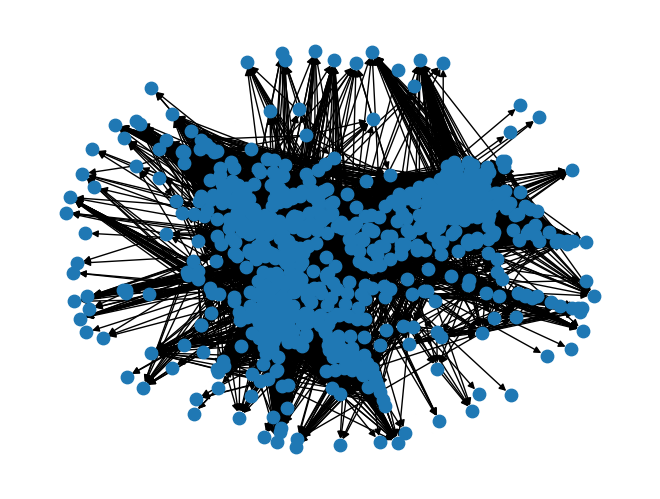

In [22]:
nx.draw(largest, node_size=80)

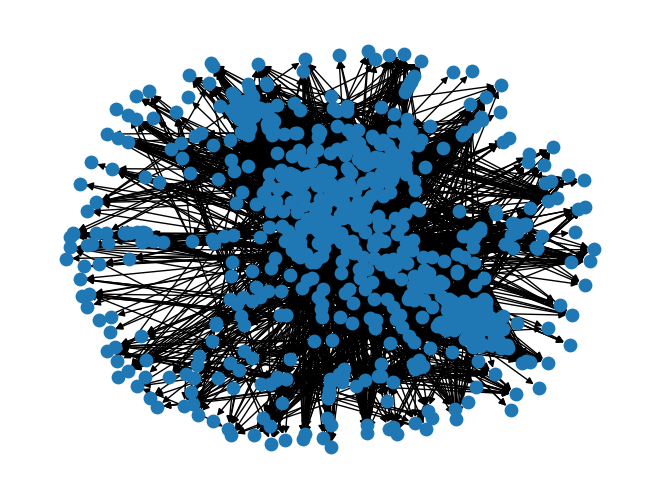

In [23]:
nx.draw(largest2, node_size=80)

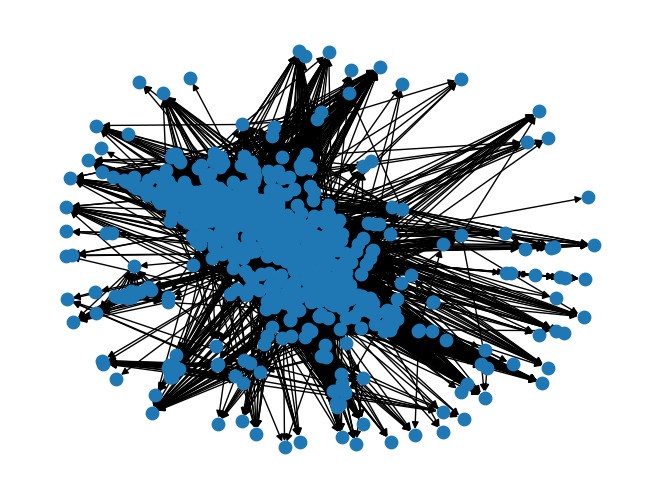

In [24]:
nx.draw(largest3, node_size=80)

## Remove the top 3 nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality, and Eigenvector. Each is in a separate plot/draw.

DiGraph with 998 nodes and 25577 edges: removed top3 nodes with max degree [107, 1888, 1800]


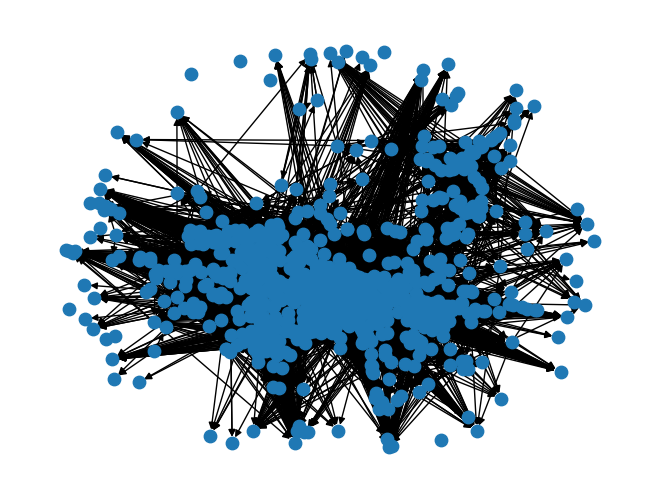

DiGraph with 750 nodes and 6491 edges: removed top3 nodes with max degree [3437, 686, 3830]


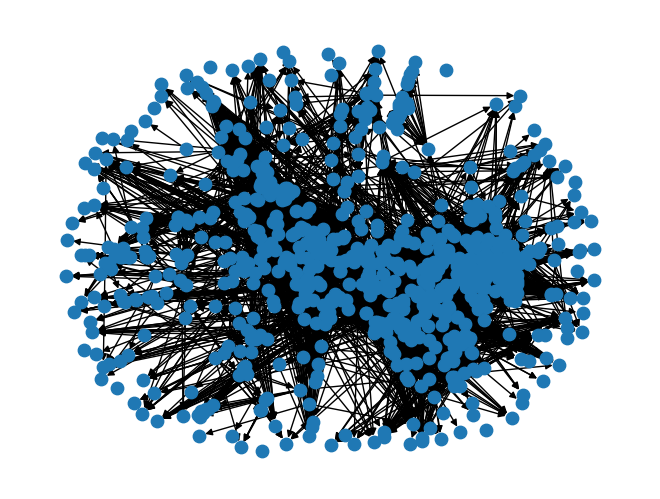

DiGraph with 744 nodes and 13386 edges: removed top3 nodes with max degree [1684, 2839, 3363]


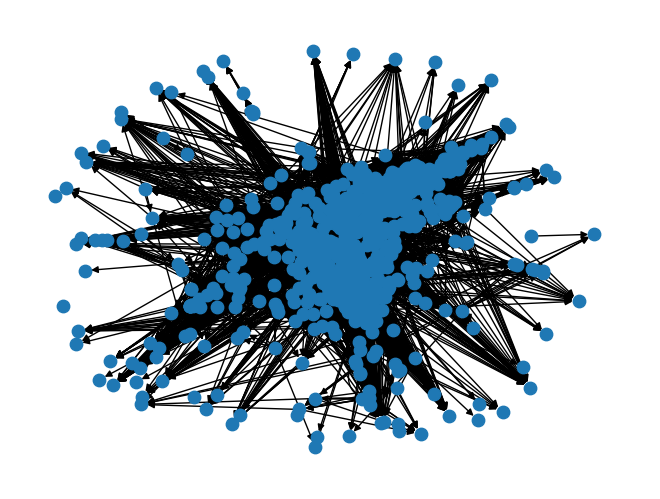

In [26]:
for i in [largest.copy(), largest2.copy(), largest3.copy()]:
    deg = nx.degree_centrality(i).items()
    top_d = sorted(deg, key=lambda pair: pair[1], reverse=True)[0:3]
    top_d = [i[0] for i in top_d]
    i.remove_nodes_from(top_d)
    print(f"{i}: removed top3 nodes with max degree {top_d}")
    nx.draw(i, node_size=80)
    plt.show()

DiGraph with 998 nodes and 26723 edges: removed top3 nodes with max closeness [1881, 1888, 1885]


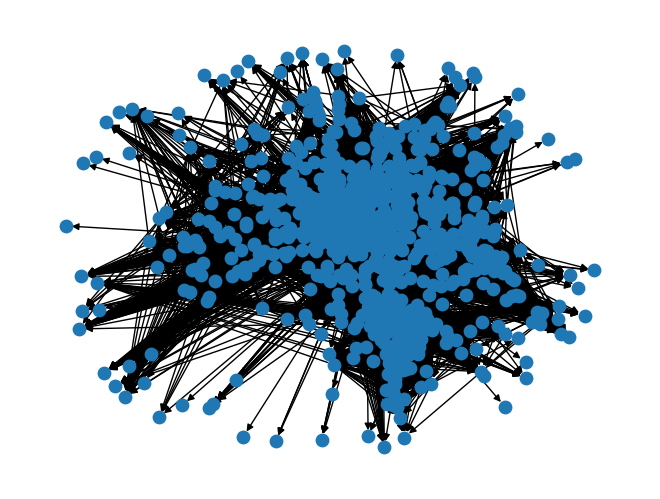

DiGraph with 750 nodes and 7186 edges: removed top3 nodes with max closeness [3948, 3918, 3962]


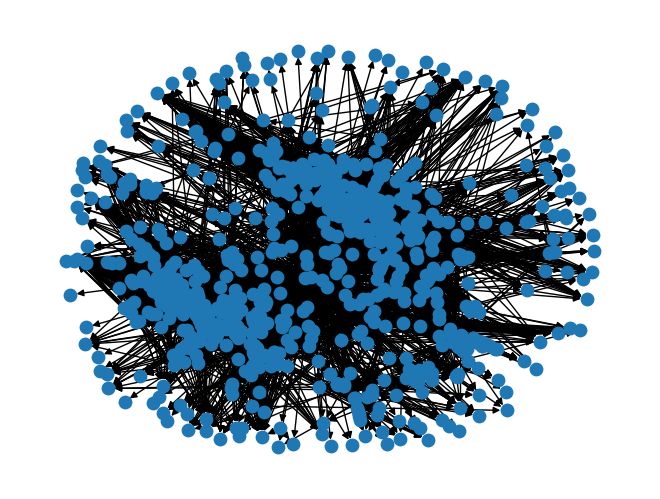

DiGraph with 744 nodes and 14127 edges: removed top3 nodes with max closeness [3397, 3434, 3403]


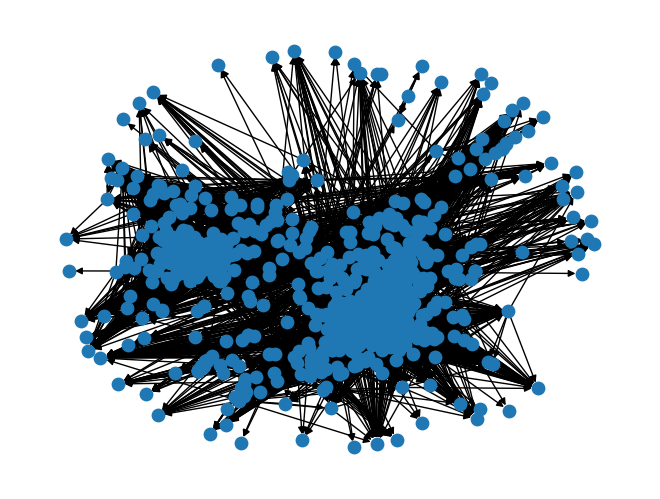

In [27]:
for i in [largest.copy(), largest2.copy(), largest3.copy()]:
    closeness = nx.closeness_centrality(i).items()
    top_c = sorted(closeness, key=lambda pair: pair[1], reverse=True)[0:3]
    top_c = [i[0] for i in top_c]
    i.remove_nodes_from(top_c)
    print(f"{i}: removed top3 nodes with max closeness {top_c}")
    nx.draw(i, node_size=80)
    plt.show()

DiGraph with 998 nodes and 26586 edges: removed top3 nodes with max betweenness [1086, 1584, 1435]


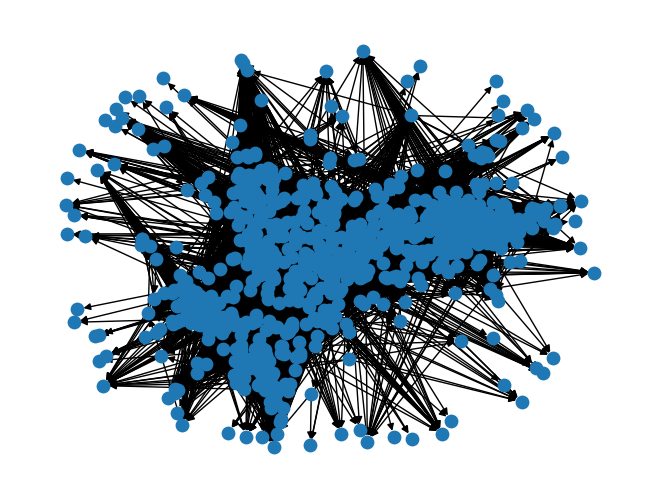

DiGraph with 750 nodes and 6625 edges: removed top3 nodes with max betweenness [3604, 3437, 698]


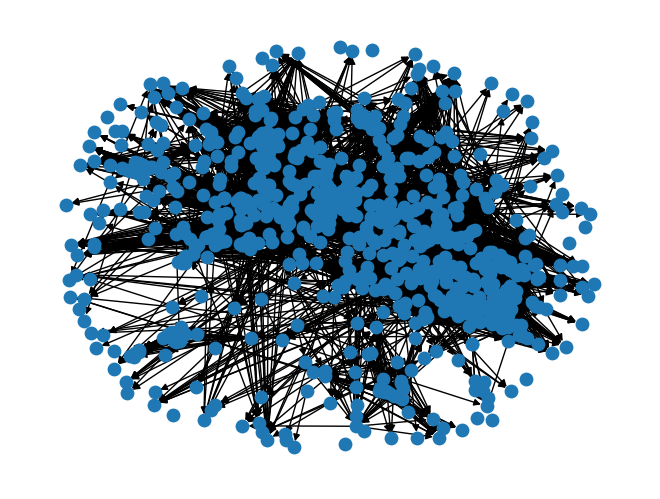

DiGraph with 744 nodes and 14179 edges: removed top3 nodes with max betweenness [2946, 3117, 3078]


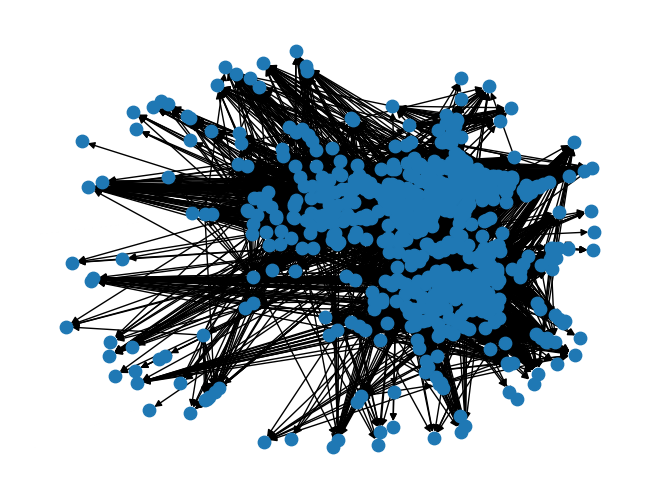

In [28]:
for i in [largest.copy(), largest2.copy(), largest3.copy()]:
    betweenness = nx.betweenness_centrality(i).items()
    top_b = sorted(betweenness, key=lambda pair: pair[1], reverse=True)[0:3]
    top_b = [i[0] for i in top_b]
    i.remove_nodes_from(top_b)
    print(f"{i}: removed top3 nodes with max betweenness {top_b}")
    nx.draw(i, node_size=80)
    plt.show()

DiGraph with 998 nodes and 25577 edges: removed top3 nodes with max degree [107, 1888, 1800]
DiGraph with 995 nodes and 25468 edges: removed top3 nodes with max closeness [1881, 1885, 1897]
DiGraph with 992 nodes and 25006 edges: removed top3 nodes with max betweenness [1086, 1584, 1435]


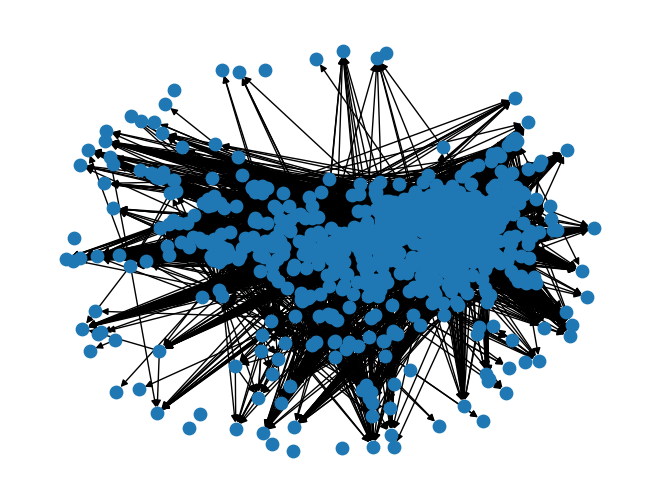

DiGraph with 750 nodes and 6491 edges: removed top3 nodes with max degree [3437, 686, 3830]
DiGraph with 747 nodes and 6320 edges: removed top3 nodes with max closeness [3948, 3938, 3962]
DiGraph with 744 nodes and 6153 edges: removed top3 nodes with max betweenness [3604, 3617, 698]


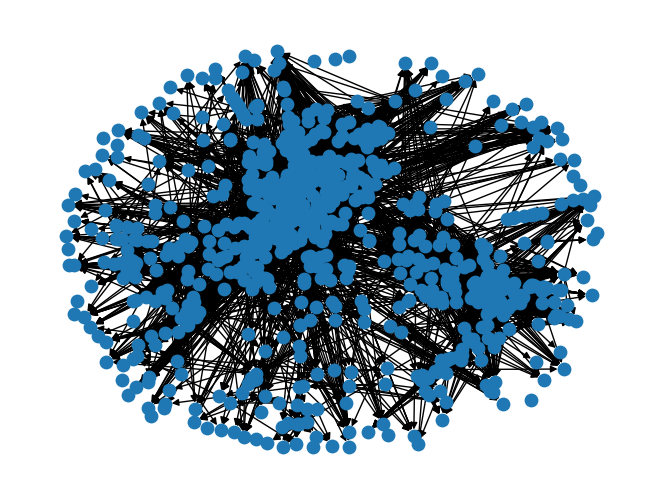

DiGraph with 744 nodes and 13386 edges: removed top3 nodes with max degree [1684, 2839, 3363]
DiGraph with 741 nodes and 13119 edges: removed top3 nodes with max closeness [3397, 3434, 3403]
DiGraph with 738 nodes and 12910 edges: removed top3 nodes with max betweenness [2946, 3117, 3078]


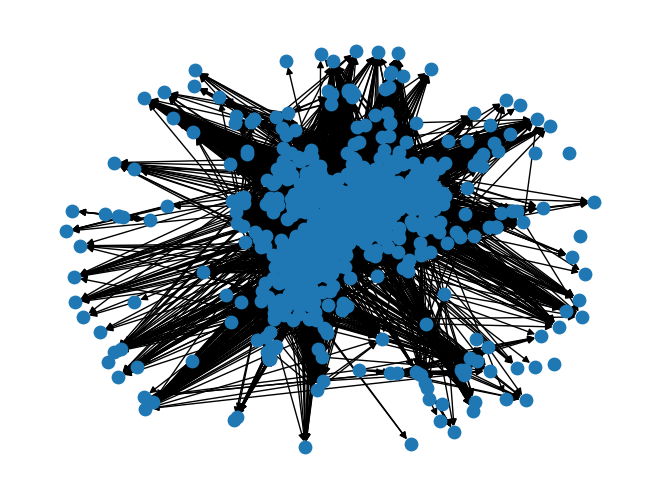

In [29]:
for i in [largest.copy(), largest2.copy(), largest3.copy()]:
    deg = nx.degree_centrality(i).items()
    top_d = sorted(deg, key=lambda pair: pair[1], reverse=True)[0:3]
    top_d = [i[0] for i in top_d]
    i.remove_nodes_from(top_d)
    print(f"{i}: removed top3 nodes with max degree {top_d}")
    
    closeness = nx.closeness_centrality(i).items()
    top_c = sorted(closeness, key=lambda pair: pair[1], reverse=True)[0:3]
    top_c = [i[0] for i in top_c]
    i.remove_nodes_from(top_c)
    print(f"{i}: removed top3 nodes with max closeness {top_c}")
    
    betweenness = nx.betweenness_centrality(i).items()
    top_b = sorted(betweenness, key=lambda pair: pair[1], reverse=True)[0:3]
    top_b = [i[0] for i in top_b]
    i.remove_nodes_from(top_b)
    print(f"{i}: removed top3 nodes with max betweenness {top_b}")
    
    nx.draw(i, node_size=80)
    plt.show()

## Draw the influencers of those top 3 communities

DiGraph with 1001 nodes and 27057 edges: top node with max closeness [1881, 0.3334852652259332]
DiGraph with 1001 nodes and 27057 edges: top node with max betweenness [1086, 0.021008218231951963]


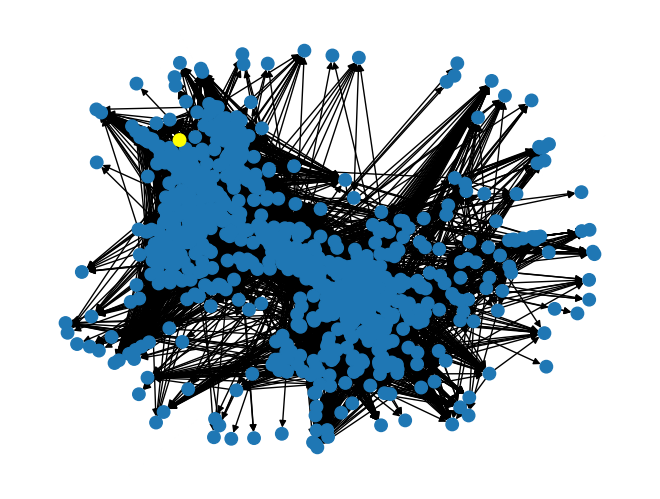

DiGraph with 753 nodes and 7312 edges: top node with max closeness [3948, 0.15646128576339816]
DiGraph with 753 nodes and 7312 edges: top node with max betweenness [3604, 0.012738103698395549]


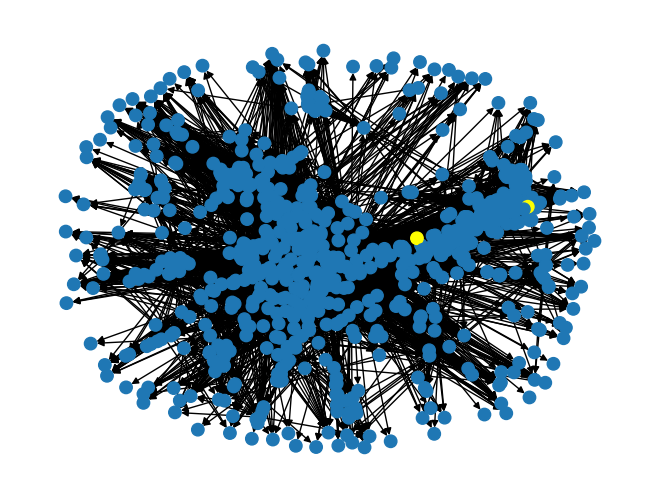

DiGraph with 747 nodes and 14397 edges: top node with max closeness [3397, 0.3098939790765014]
DiGraph with 747 nodes and 14397 edges: top node with max betweenness [2946, 0.029174094184520032]


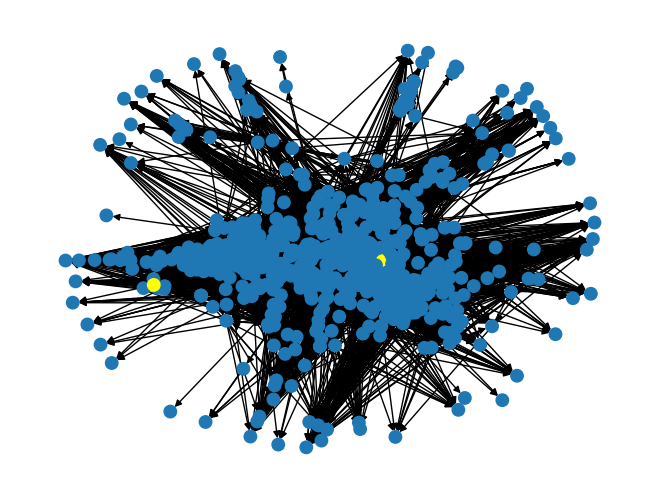

In [30]:
for i in [largest.copy(), largest2.copy(), largest3.copy()]:
    closeness = nx.closeness_centrality(i).items()
    top_c = sorted(closeness, key=lambda pair: pair[1], reverse=True)[0]
    top_c = [i for i in top_c]
    print(f"{i}: top node with max closeness {top_c}")
        
    betweenness = nx.betweenness_centrality(i).items()
    top_b = sorted(betweenness, key=lambda pair: pair[1], reverse=True)[0]
    top_b = [i for i in top_b]
    print(f"{i}: top node with max betweenness {top_b}")
    
    top_i = top_c + top_b
    color_map= ['yellow' if node in top_i else 'tab:blue' for node in i.nodes]

    nx.draw(i, node_color=color_map, node_size=80)
    plt.show()

## Design an action plan:

Action Plan for Anush Telecom Company

Budget: $500,000

Cost per Action: $2 per click

Primary Target Audience: Adults 25-45, urban/suburban, tech-savvy

Action Steps:

Market Research: Understand market trends and consumer preferences.
Online Presence: Invest in SEO, online ads, and social media.
Partnerships: Collaborate with influencers and local businesses.
Campaigns: Run interactive online campaigns for user participation.
Data Analytics: Implement analytics tools for real-time adjustments.
Customer Engagement: Strengthen online presence for customer interaction.
Monitoring and Optimization: Regularly adjust strategies based on campaign performance.
Measuring ROI: Use KPIs to measure the return on investment.
Feedback Loop: Collect insights for continual refinement.
